In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#'''
#Created on Sun Oct 27 10:36:55 2019

#@author: dcr

#DCR's solution to textbook Exercise 9.2 (faster Laplace's equation solver)
#'''

import matplotlib.pyplot as plt
import numpy as np
import time

In [6]:
# Constants
L = 1.0        # Length of box [m]
M = 100        # Grid squares on a side (+ 1 for endpoints)
a = L / M      # Size of the grid square [m] -- not used
V = 1.0        # Voltage at top wall [V]
target = 1e-4  # Target accuracy
omega = 0.7    # Overrelaxation parameter

Processing...
Loops complete: 100
Loops complete: 200
Loops complete: 300
Loops complete: 400
Loops complete: 500

Process time = 8.3 sec, loops = 535.


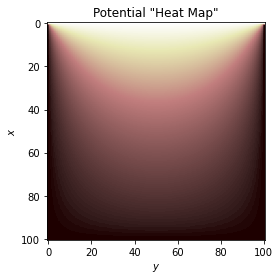

In [7]:
# Create array to hold potential values
phi = np.zeros([M + 1, M + 1], float)  # 0 & M are boundary values
phi[0, :] = V  # top boundary condition

print('Processing...')

t0 = time.process_time()

# Main loop
nLoops = 0
while True:

    # Assume converged until proven otherwise
    converged = True

    # Calculate new values of the potential (interior points only)
    for i in range(1, M):
        for j in range(1, M):
            phioldij = phi[i, j]
            phi[i, j] = \
                (1 + omega)*(phi[i+1, j] + phi[i-1, j]
                             + phi[i, j+1] + phi[i, j-1])/4 \
                - omega*phioldij
            if converged and abs(phi[i, j] - phioldij) > target:
                converged = False

    nLoops += 1

    if nLoops % 100 == 0:  # heartbeat
        print('Loops complete:', nLoops, flush=True)

    if converged:
        break

# =============================================================================
# # Even faster version using NumPy ops, but for relaxation only...
# nLoops = 0
# while True:
#     phiold = phi.copy()
#     phi[1:M, 1:M] = (phi[2:M+1, 1:M] + phi[0:M-1, 1:M]
#                      + phi[1:M, 2:M+1] + phi[1:M, 0:M-1])/4
#     nLoops += 1
#     if nLoops % 1000 == 0:
#         print('Loops complete:', nLoops, flush=True)
#     if np.max(abs(phi - phiold)) <= target:
#         break
# =============================================================================

t1 = time.process_time()
print(f'\nProcess time = {t1 - t0:.3g} sec, loops = {nLoops}.')

# Make a plot
plt.imshow(phi)
plt.pink()
plt.xlabel(r'$y$')  # imshow() uses matrix row/column convention
plt.ylabel(r'$x$')
plt.title('Potential "Heat Map"')
plt.savefig('bigM.pdf')
plt.show()

With a larger target (1e-4), the run time is faster (3.06s) because it only goes through 202 loops
With a smaller target (1e-10), the run time is slower (12.8s) because it goes through 866 loops
With a smaller omega (0.7), the run time is slower (19.8s) becuase it goes through 1352 loops
With the slightest change of omega the run time is forever 
With smaller omega (0.7) and larger target (1e-4), the run time is faster (7.92) and goes through 535 loops

In [8]:
#boundary conditions on walls of graph
#phi[0, :]=300, everyone value = 300 on all sides, make top on 350, top temp only changes, heat diffuses downwards 
#remake for loops 
#set values in range of box = 0
#copy first and change range (1,40), (60, 100) 

Processing...
Loops complete: 100
Loops complete: 200

Process time = 4.16 sec, loops = 270.


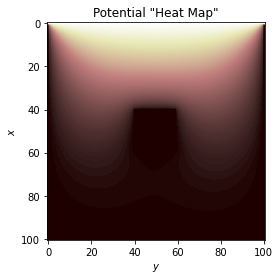

In [10]:
# Create array to hold potential values
phi = np.zeros([M + 1, M + 1], float)  # 0 & M are boundary values
phi[0, :] = V  # top boundary condition

print('Processing...')

t0 = time.process_time()

# Main loop
nLoops = 0
while True:

    # Assume converged until proven otherwise
    converged = True

    # Calculate new values of the potential (interior points only)
    for i in range(1, M):
        for j in range(1, M):
            phioldij = phi[i, j]
            if ((i >= 40 and i <60) and (j >= 40 and j < 60)):
                continue 
            else: 
                phi[i, j] = \
                    (1 + omega)*(phi[i+1, j] + phi[i-1, j]
                                 + phi[i, j+1] + phi[i, j-1])/4 \
                    - omega*phioldij
                if converged and abs(phi[i, j] - phioldij) > target:
                    converged = False

    nLoops += 1

    if nLoops % 100 == 0:  # heartbeat
        print('Loops complete:', nLoops, flush=True)

    if converged:
        break

t1 = time.process_time()
print(f'\nProcess time = {t1 - t0:.3g} sec, loops = {nLoops}.')

# Make a plot
plt.imshow(phi)
plt.pink()
plt.xlabel(r'$y$')  # imshow() uses matrix row/column convention
plt.ylabel(r'$x$')
plt.title('Potential "Heat Map"')
plt.savefig('bigM.pdf')
plt.show()

Processing...
Loops complete: 100
Loops complete: 200

Process time = 4.01 sec, loops = 270.


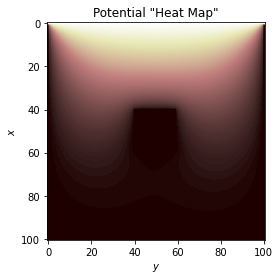

In [11]:
# Create array to hold potential values
phi = np.zeros([M + 1, M + 1], float)  # 0 & M are boundary values
phi[0, :] = V  # top boundary condition

print('Processing...')

t0 = time.process_time()

# Main loop
nLoops = 0
while True:

    # Assume converged until proven otherwise
    converged = True

    # Calculate new values of the potential (interior points only)
    for i in range(1, M):
        for j in range(1, M):
            if ((i >= 40 and i <60) and (j >= 40 and j < 60)):
                continue 
            else: 
                phioldij = phi[i, j]
                phi[i, j] = \
                    (1 + omega)*(phi[i+1, j] + phi[i-1, j]
                                 + phi[i, j+1] + phi[i, j-1])/4 \
                    - omega*phioldij
                if converged and abs(phi[i, j] - phioldij) > target:
                    converged = False

    nLoops += 1

    if nLoops % 100 == 0:  # heartbeat
        print('Loops complete:', nLoops, flush=True)

    if converged:
        break

t1 = time.process_time()
print(f'\nProcess time = {t1 - t0:.3g} sec, loops = {nLoops}.')

# Make a plot
plt.imshow(phi)
plt.pink()
plt.xlabel(r'$y$')  # imshow() uses matrix row/column convention
plt.ylabel(r'$x$')
plt.title('Potential "Heat Map"')
plt.savefig('bigM.pdf')
plt.show()